# Predicting cricket team players (Multiclass - multitarget classification)
                                                                                                                                                                                                    - Shivi Sharma 
                                                                                                                                                                                            (2018BTechCSE118)

## 1.) Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.pandas.set_option('display.max_columns', None) #to display all the columns of dataframe

## 2.) Importing Dataset

In [2]:
match = pd.read_csv("Match.csv")
match.head()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN


In [3]:
player_performance = pd.read_csv("Player_performance.csv")
player_performance.head()

,Match_id,Players_1,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Players_2,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Players_3,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Players_4,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Players_5,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Players_6,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Players_7,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Players_8,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Players_9,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Players_10,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Players_11,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Players_12,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Players_13,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Players_14,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Players_15,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Players_16,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Players_17,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Players_18,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Players_19,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Players_20,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Players_21,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Players_22,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22
0,1004261,G Malla,11,12,-,-,-,AK Mandal,20,39,-,-,-,S Vesawkar,14,70,-,-,-,P Khadka,0,1,2,12,0,Sagar Pun,7,31,1,3,1,R Rijal,3,2,-,-,-,B Bhandari,9,19,-,-,-,Sompal Kami,12,28,3,21,0,B Regmi,7,21,5,18,1,Karan KC,0,2,3,18,1,S Lamichhane,1,3,2.5,14,0,SJ Myburgh,33,39,-,-,-,MJG Rippon,6,9,9.1,21,3,W Barresi,37,32,-,-,-,BN Cooper,6,13,-,-,-,RE van der Merwe,4,6,5,7,2,T van der Gugten,-,-,8,21,3,Mudassar Bukhari,-,-,8,22,1,Ahsan Malik,-,-,2,3,0,PA van Meekeren,-,-,6,10,1,-,-,-,-,-,-,-,-,-,-,-,-
1,1004269,C Carter,41,62,-,-,-,KD Shah,1,3,-,-,-,Babar Hayat,78,68,-,-,-,Nizakat Khan,20,12,-,-,-,Anshuman Rath,3,5,5,25,1,Tanwir Afzal,-,-,5,28,0,Nadeem Ahmed,-,-,5,20,3,Aizaz Khan,-,-,2,19,0,Ehsan Khan,-,-,4,11,3,Tanveer Ahmed,-,-,2,20,3,-,-,-,-,-,-,IA Karim,33,40,-,-,-,AA Obanda,39,35,-,-,-,DM Gondaria,8,12,-,-,-,RR Patel,0,1,3,27,0,CO Obuya,17,20,-,-,-,NK Patel,0,4,3,18,0,Gurdeep Singh,13,10,-,-,-,NN Odhiambo,1,3,3,8,0,SO Ngoche,0,1,6,28,0,NM Odhiambo,11,6,4,33,1,LN Oluoch,1,2,6.1,29,3
2,1004283,KJ Coetzer,53,29,-,-,NaN,CD Wallace,14,8,-,-,-,CS MacLeod,28,17,-,-,-,MH Cross,1,5,-,-,-,RD Berrington,4,7,-,-,-,PL Mommsen,12,16,-,-,-,CD de Lange,26,26,4,26,2,SM Sharif,12,12,3,27,0,CB Sole,-,-,4,18,0,AC Evans,-,-,3,31,0,MRJ Watt,-,-,4,20,2,Nizakat Khan,43,24,-,-,-,Aizaz Khan,12,18,4,37,2,Babar Hayat,26,25,-,-,-,Anshuman Rath,32,27,-,-,-,Ehsan Khan,2,3,4,28,2,Tanwir Afzal,7,6,4,43,1,Nadeem Ahmed,-,-,4,18,1,Tanveer Ahmed,-,-,4,24,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,1004285,KJ Coetzer,48,41,-,-,-,MH Cross,13,22,-,-,-,CS MacLeod,102,106,-,-,-,MA Leask,12,23,2,23,0,RD Berrington,10,29,-,-,-,CD de Lange,11,18,10,38,3,CD Wallace,52,51,-,-,-,SM Sharif,2,2,7,34,0,MRJ Watt,1,2,10,41,1,AC Evans,-,-,8.1,42,2,CB Sole,-,-,9,24,4,C Carter,15,24,-,-,-,Aizaz Khan,25,40,9,71,1,Babar Hayat,56,66,-,-,-,Nizakat Khan,40,56,-,-,-,Anshuman Rath,13,20,3,10,0,Ehsan Khan,7,16,10,52,1,Shahid Wasif,4,8,-,-,-,Waqas Khan,8,17,-,-,-,Tanwir Afzal,20,16,8,35,1,Nadeem Ahmed,14,11,10,37,1,Tanveer Ahmed,0,1,10,46,3
4,1007649,PJ Moor,3,5,-,-,-,CJ Chibhabha,13,41,8,13,0,H Masakadza,14,21,2.3,19,0,CR Ervine,21,42,-,-,-,V Sibanda,5,20,-,-,-,Sikandar Raza,23,54,5,20,0,E Chigumbura,41,64,4,32,0,R Mutumbami,15,27,-,-,-,AG Cremer,8,11,10,47,0,TL Chatara,4,10,7,20,1,T Muzarabani,1,1,6,18,0,KL Rahul,100,115,-,-,-,KK Nair,7,20,-,-,-,AT Rayudu,62,119,-,-,-,DS Kulkarni,-,-,10,41,2,BB Sran,-,-,10,36,2,JJ Bumrah,-,-,9.5,19,4,AR Patel,-,-,10,25,1,YS Chahal,-,-,10,27,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


## 3.) Data Pre-processing

In [4]:
# merging matches and player performance dataset on column 'Match_id'
dataset = match.merge(player_performance,on = "Match_id",how = "left")
dataset.head()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome,Players_1,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Players_2,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Players_3,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Players_4,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Players_5,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Players_6,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Players_7,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Players_8,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Players_9,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Players_10,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Players_11,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Players_12,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Players_13,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Players_14,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Players_15,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Players_16,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Players_17,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Players_18,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Players_19,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Players_20,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Players_21,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Players_22,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cric

## 4.) EDA (Exploratory Data Analysis)

In [5]:
match.shape

(1951, 25)

In [6]:
player_performance.shape

(1905, 133)

In [7]:
dataset.shape

(1951, 157)

In [8]:
dataset.describe()

,Unnamed: 0,Match_id,Match_number,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Bat_Runs_2,Ball Faced_2,Bat_Runs_3,Ball Faced_3
count,1951.000000,1.951000e+03,1704.000000,898.000000,984.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,975.000000,6.451639e+05,8.914319,67.272829,5.813008,31.764304,38.300787,31.140682,37.675591,33.543832,40.592651
std,563.349507,2.859596e+05,12.338385,55.486861,2.217014,34.028590,34.670498,33.657899,34.481403,32.776575,33.709304
min,0.000000,2.252450e+05,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,487.500000,4.126985e+05,2.000000,22.250000,4.000000,6.000000,12.000000,7.000000,12.000000,7.000000,13.000000
50%,975.000000,5.949090e+05,4.000000,55.000000,6.000000,20.000000,28.000000,20.000000,26.000000,23.000000,31.000000
75%,1462.500000,9.073920e+05,9.000000,96.000000,7.000000,47.000000,55.000000,44.000000,53.000000,52.000000,61.000000
max,1950.000000,1.185156e+06,71.000000,282.000000,10.000000,237.000000,162.000000,264.000000,172.000000,194.000000,160.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Columns: 157 entries, Unnamed: 0 to Wicket_22
dtypes: float64(9), int64(2), object(146)
memory usage: 2.4+ MB


In [10]:
# to get total number of null values in each column

var, var_count = [],[]
for i in dataset.columns:
    if dataset[i].isnull().sum()>0:
        var.append(i)
        var_count.append(dataset[i].isnull().sum())

<AxesSubplot:>

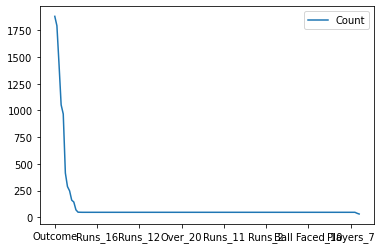

In [11]:
# sorting and then plotting the null values count for each column

var_count_metrix = pd.DataFrame(var_count, index=var, columns=['Count'])  
var_count_metrix = var_count_metrix.sort_values('Count', ascending=False)
var_count_metrix.plot()

In [12]:
# top 15 columns with max null values

var_count_metrix.head(15)

,Count
Outcome,1882
Method,1794
Neutral_venue,1434
Winner_runs,1053
Winner_wickets,967
Tv_umpire,414
City,287
Match_number,247
Reserve_umpire,160
Player_of_match,142


In [13]:
# first 25 features of dataset

column = [var for var in dataset.columns]
print(column[:25])

['Unnamed: 0', 'Match_id', 'Team1', 'Team2', 'Gender', 'Date', 'Season', 'Series/Competition', 'Match_number', 'Venue', 'City', 'Neutral_venue', 'Toss_winner', 'Toss_decision', 'Player_of_match', 'Umpire1', 'Umpire2', 'Reserve_umpire', 'Tv_umpire', 'Match_referee', 'Winner', 'Winner_runs', 'Winner_wickets', 'Method', 'Outcome']


<AxesSubplot:>

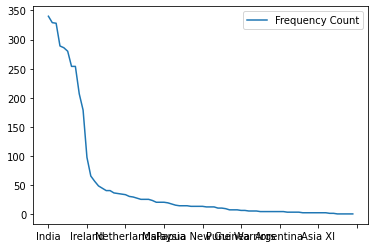

In [14]:
# adding all countries from columns team1 and team2 to single list and then counting their occuring frequency

team_1 = dataset['Team1'].to_list()
team_2 = dataset['Team2'].to_list()
team_1.extend(team_2)
countries = set(team_1)
country_count=[]
for i in countries:
    country_count.append(team_1.count(i))

country_count_metrix = pd.DataFrame(country_count, index=countries, columns=['Frequency Count'])  
country_count_metrix.sort_values('Frequency Count', ascending=False).plot()

In [15]:
# top 12 countries with maximum occurence

filtered_countries = country_count_metrix.sort_values('Frequency Count', ascending=False).head(12)
filtered_countries

,Frequency Count
India,340
Australia,329
Sri Lanka,328
England,289
South Africa,286
Pakistan,280
West Indies,254
New Zealand,254
Bangladesh,207
Zimbabwe,179


## 5.) Feature Engineering

In [16]:
#filtering out all the countries other then top 12 countries
filtered_countries= filtered_countries.index.to_list()
dataset = dataset[dataset['Team1'].isin(filtered_countries) & dataset['Team2'].isin(filtered_countries)]
dataset


,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome,Players_1,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Players_2,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Players_3,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Players_4,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Players_5,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Players_6,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Players_7,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Players_8,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Players_9,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Players_10,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Players_11,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Players_12,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Players_13,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Players_14,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Players_15,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Players_16,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Players_17,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Players_18,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Players_19,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Players_20,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Players_21,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Players_22,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cric

In [17]:
#drooping columns based on domain knowledge
col_to_drop = ['Date', 'Season','Match_number','Venue','City', 'Neutral_venue', 'Toss_winner', 'Player_of_match', 'Umpire1', 'Umpire2',
               'Reserve_umpire', 'Tv_umpire', 'Match_referee', 'Winner','Method', 'Outcome']
dataset.drop(col_to_drop, axis='columns', inplace=True)
dataset

,Unnamed: 0,Match_id,Team1,Team2,Gender,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Players_2,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Players_3,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Players_4,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Players_5,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Players_6,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Players_7,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Players_8,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Players_9,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Players_10,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Players_11,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Players_12,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Players_13,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Players_14,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Players_15,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Players_16,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Players_17,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Players_18,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Players_19,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Players_20,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Players_21,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Players_22,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22
0,0,1000887,Australia,Pakistan,male,Pakistan in Australia ODI Series,bat,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,Pakistan in Australia ODI Series,bat,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000891,Australia,Pakistan,male,Pakistan in Australia ODI Series,field,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000893,Australia,Pakistan,male,Pakistan in Australia ODI Series,bat,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,Pakistan in Australia ODI Series,bat,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
# exporting data set for manual processing
dataset.to_csv('PreProcessed.csv', index=False)

In [19]:
# import the dataset after manual processing
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,Unnamed: 0,Match_id,Unnamed: 0.1,Team1,Team2,Gender,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,2,1019973,21,New Zealand,Bangladesh,male,Bangladesh in New Zealand ODI Series,bat,77.0,NaN,15,17,-,-,-,137,118,-,-,-,31,36,-,-,-,22,32,-,-,-,12,13,7,31,3,87,60,-,-,-,5,6,-,-,-,8,7,10,58,1,7,3,10,60,3,-,-,9,40,0,-,-,9,49,3,38,57,-,-,-,16,21,-,-,-,1,8,4,25,0,0,3,-,-,-,59,53,10,68,3,42,46,-,-,-,16,11,-,-,-,50,44,7,40,0,14,10,10,61,0,2,11,9,70,2,0,1,10,60,2,MJ Guptill,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,TA Boult,LH Ferguson,Tamim Iqbal,Imrul Kayes,Soumya Sarkar,Mahmudullah,Shakib Al Hasan,Mushfiqur Rahim,Sabbir Rahman,Mosaddek Hossain,Mashrafe Mortaza,Taskin Ahmed,Mustafizur Rahman
1,3,1019975,22,New Zealand,Bangladesh,male,Bangladesh in New Zealand ODI Series,field,67.0,NaN,0,4,-,-,-,14,34,5,21,3,22,34,-,-,-,109,107,-,-,-,28,31,2,12,0,3,7,2,12,0,35,38,-,-,-,9,17,8,19,2,3,7,9,31,2,4,6,8,50,1,12,11,8.5,23,2,16,23,-,-,-,59,88,-,-,-,38,48,-,-,-,1,9,-,-,-,7,10,10,45,2,3,8,2,12,1,2,5,8,47,0,24,30,-,-,-,17,19,10,47,3,0,4,10,44,3,1,9,10,44,1,MJ Guptill,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,LH Ferguson,TA Boult,Tamim Iqbal,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Tanbir Hayder,Nurul Hasan,Mashrafe Mortaza,Taskin Ahmed,Subashis Roy
2,4,1020013,24,New Zealand,Australia,male,Chappell-Hadlee Trophy,field,6.0,NaN,61,70,-,-,-,7,9,-,-,-,24,33,-,-,-,16,24,-,-,-,73,73,-,-,-,2,6,3,18,1,48,45,5,45,0,7,19,10,43,3,0,1,10,63,2,3,6,10,44,2,16,7,9,53,2,4,7,-,-,-,5,15,5,19,1,16,21,-,-,-,7,7,-,-,-,20,24,-,-,-,4,11,-,-,-,146,116,10,43,3,25,48,6,29,1,36,28,9,62,2,3,3,10,57,1,0,0,10,47,1,MJ Guptill,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner,TG Southee,LH Ferguson,TA Boult,AJ Finch,TM Head,SE Marsh,PSP Handscomb,GJ Maxwell,SD Heazlett,MP Stoinis,JP Faulkner,PJ Cummins,MA Starc,JR Hazlewood
3,5,1020031,25,New Zealand,South Africa,male,South Africa in New Zealand ODI Series,field,NaN,4.0,31,39,-,-,-,0,11,-,-,-,59,53,2,16,1,1,3,-,-,-,2,4,-,-,-,29,35,-,-,-,17,27,7,33,1,34,19,4,27,0,24,12,7,44,2,-,-,7,45,1,-,-,7,36,1,69,64,-,-,-,35,43,-,-,-,14,18,-,-,-,37,33,-,-,-,1,4,1,4,0,0,1,-,-,-,16,15,7,61,4,29,20,5,27,0,-,-,7,24,2,-,-,7,42,0,-,-,7,39,1,DG Brownlie,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme,TG Southee,TA Boult,IS Sodhi,Q de Kock,HM Amla,F du Plessis,AB de Villiers,JP Duminy,F Behardien,CH Morris,AL Phehlukwayo,K Rabada,Imran Tahir,T Shamsi
4,6,1020033,26,New Zealand,South Africa,male,South Africa in New Zealand ODI Series,field,6.0,NaN,34,43,-

In [20]:
# counting the frequency of occurences of Gender column values
gender_count = dataset.groupby(['Gender']).count()
gender_count

,Unnamed: 0,Match_id,Unnamed: 0.1,Team1,Team2,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,70,70,70,70,70,70,70,42,28,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
male,840,840,840,840,840,840,840,510,319,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840


In [21]:
# dropping rows with Gender column values as 'female'
dataset.drop(dataset[dataset['Gender'] =='female'].index, inplace = True)
dataset

,Unnamed: 0,Match_id,Unnamed: 0.1,Team1,Team2,Gender,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,2,1019973,21,New Zealand,Bangladesh,male,Bangladesh in New Zealand ODI Series,bat,77.0,NaN,15,17,-,-,-,137,118,-,-,-,31,36,-,-,-,22,32,-,-,-,12,13,7,31,3,87,60,-,-,-,5,6,-,-,-,8,7,10,58,1,7,3,10,60,3,-,-,9,40,0,-,-,9,49,3,38,57,-,-,-,16,21,-,-,-,1,8,4,25,0,0,3,-,-,-,59,53,10,68,3,42,46,-,-,-,16,11,-,-,-,50,44,7,40,0,14,10,10,61,0,2,11,9,70,2,0,1,10,60,2,MJ Guptill,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,TA Boult,LH Ferguson,Tamim Iqbal,Imrul Kayes,Soumya Sarkar,Mahmudullah,Shakib Al Hasan,Mushfiqur Rahim,Sabbir Rahman,Mosaddek Hossain,Mashrafe Mortaza,Taskin Ahmed,Mustafizur Rahman
1,3,1019975,22,New Zealand,Bangladesh,male,Bangladesh in New Zealand ODI Series,field,67.0,NaN,0,4,-,-,-,14,34,5,21,3,22,34,-,-,-,109,107,-,-,-,28,31,2,12,0,3,7,2,12,0,35,38,-,-,-,9,17,8,19,2,3,7,9,31,2,4,6,8,50,1,12,11,8.5,23,2,16,23,-,-,-,59,88,-,-,-,38,48,-,-,-,1,9,-,-,-,7,10,10,45,2,3,8,2,12,1,2,5,8,47,0,24,30,-,-,-,17,19,10,47,3,0,4,10,44,3,1,9,10,44,1,MJ Guptill,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,LH Ferguson,TA Boult,Tamim Iqbal,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Tanbir Hayder,Nurul Hasan,Mashrafe Mortaza,Taskin Ahmed,Subashis Roy
2,4,1020013,24,New Zealand,Australia,male,Chappell-Hadlee Trophy,field,6.0,NaN,61,70,-,-,-,7,9,-,-,-,24,33,-,-,-,16,24,-,-,-,73,73,-,-,-,2,6,3,18,1,48,45,5,45,0,7,19,10,43,3,0,1,10,63,2,3,6,10,44,2,16,7,9,53,2,4,7,-,-,-,5,15,5,19,1,16,21,-,-,-,7,7,-,-,-,20,24,-,-,-,4,11,-,-,-,146,116,10,43,3,25,48,6,29,1,36,28,9,62,2,3,3,10,57,1,0,0,10,47,1,MJ Guptill,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner,TG Southee,LH Ferguson,TA Boult,AJ Finch,TM Head,SE Marsh,PSP Handscomb,GJ Maxwell,SD Heazlett,MP Stoinis,JP Faulkner,PJ Cummins,MA Starc,JR Hazlewood
3,5,1020031,25,New Zealand,South Africa,male,South Africa in New Zealand ODI Series,field,NaN,4.0,31,39,-,-,-,0,11,-,-,-,59,53,2,16,1,1,3,-,-,-,2,4,-,-,-,29,35,-,-,-,17,27,7,33,1,34,19,4,27,0,24,12,7,44,2,-,-,7,45,1,-,-,7,36,1,69,64,-,-,-,35,43,-,-,-,14,18,-,-,-,37,33,-,-,-,1,4,1,4,0,0,1,-,-,-,16,15,7,61,4,29,20,5,27,0,-,-,7,24,2,-,-,7,42,0,-,-,7,39,1,DG Brownlie,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme,TG Southee,TA Boult,IS Sodhi,Q de Kock,HM Amla,F du Plessis,AB de Villiers,JP Duminy,F Behardien,CH Morris,AL Phehlukwayo,K Rabada,Imran Tahir,T Shamsi
4,6,1020033,26,New Zealand,South Africa,male,South Africa in New Zealand ODI Series,field,6.0,NaN,34,43,-

In [22]:
# counting the frequency of occurences of Gender column values after dropping 'female' rows
gender_count = dataset.groupby(['Gender']).count()
gender_count

,Unnamed: 0,Match_id,Unnamed: 0.1,Team1,Team2,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
male,840,840,840,840,840,840,840,510,319,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840


In [23]:
# printing all the categorical columns; as we can see it consists of numerical column names too
cat_vars = [var for var in dataset.columns if dataset[var].dtype == 'O']
print(cat_vars)

['Team1', 'Team2', 'Gender', 'Series/Competition', 'Toss_decision', 'Over_1', 'Runs_1', 'Wicket_1', 'Over_2', 'Runs_2', 'Wicket_2', 'Over_3', 'Runs_3', 'Wicket_3', 'Over_4', 'Runs_4', 'Wicket_4', 'Over_5', 'Runs_5', 'Wicket_5', 'Bat_Runs_6', 'Ball Faced_6', 'Over_6', 'Runs_6', 'Wicket_6', 'Bat_Runs_7', 'Ball Faced_7', 'Over_7', 'Runs_7', 'Wicket_7', 'Bat_Runs_8', 'Ball Faced_8', 'Over_8', 'Runs_8', 'Wicket_8', 'Bat_Runs_9', 'Ball Faced_9', 'Over_9', 'Runs_9', 'Wicket_9', 'Bat_Runs_10', 'Ball Faced_10', 'Over_10', 'Runs_10', 'Wicket_10', 'Bat_Runs_11', 'Ball Faced_11', 'Over_11', 'Runs_11', 'Wicket_11', 'Bat_Runs_12', 'Ball Faced_12', 'Over_12', 'Runs_12', 'Wicket_12', 'Over_13', 'Runs_13', 'Wicket_13', 'Over_14', 'Runs_14', 'Wicket_14', 'Bat_Runs_15', 'Ball Faced_15', 'Over_15', 'Runs_15', 'Wicket_15', 'Bat_Runs_16', 'Ball Faced_16', 'Over_16', 'Runs_16', 'Wicket_16', 'Bat_Runs_17', 'Ball Faced_17', 'Over_17', 'Runs_17', 'Wicket_17', 'Bat_Runs_18', 'Ball Faced_18', 'Over_18', 'Runs_18'

In [24]:
# getting columns having numerical values but datatype displayed as object
conversion_cols = [ 'Over_1', 'Runs_1', 'Wicket_1', 'Over_2', 'Runs_2', 'Wicket_2', 'Over_3', 'Runs_3', 'Wicket_3', 'Over_4', 'Runs_4', 'Wicket_4', 
                   'Over_5', 'Runs_5', 'Wicket_5', 'Bat_Runs_6', 'Ball Faced_6', 'Over_6', 'Runs_6', 'Wicket_6', 'Bat_Runs_7', 'Ball Faced_7', 'Over_7', 'Runs_7', 
                   'Wicket_7', 'Bat_Runs_8', 'Ball Faced_8', 'Over_8', 'Runs_8', 'Wicket_8', 'Bat_Runs_9', 'Ball Faced_9', 'Over_9', 'Runs_9', 'Wicket_9',
                   'Bat_Runs_10', 'Ball Faced_10', 'Over_10', 'Runs_10', 'Wicket_10', 'Bat_Runs_11', 'Ball Faced_11', 'Over_11', 'Runs_11', 'Wicket_11', 
                   'Bat_Runs_12', 'Ball Faced_12', 'Over_12', 'Runs_12', 'Wicket_12', 'Over_13', 'Runs_13', 'Wicket_13', 'Over_14', 'Runs_14', 'Wicket_14', 
                   'Bat_Runs_15', 'Ball Faced_15', 'Over_15', 'Runs_15', 'Wicket_15', 'Bat_Runs_16', 'Ball Faced_16', 'Over_16', 'Runs_16', 'Wicket_16', 
                   'Bat_Runs_17', 'Ball Faced_17', 'Over_17', 'Runs_17', 'Wicket_17', 'Bat_Runs_18', 'Ball Faced_18', 'Over_18', 'Runs_18', 'Wicket_18', 
                   'Bat_Runs_19', 'Ball Faced_19', 'Over_19', 'Runs_19', 'Wicket_19', 'Bat_Runs_20', 'Ball Faced_20', 'Over_20', 'Runs_20', 'Wicket_20', 
                   'Bat_Runs_21', 'Ball Faced_21', 'Over_21', 'Runs_21', 'Wicket_21', 'Bat_Runs_22', 'Ball Faced_22', 'Over_22', 'Runs_22', 'Wicket_22']

# converting the columns having numerical values to data type as numerical from object.
for i in conversion_cols:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')
cat_vars = [var for var in dataset.columns if dataset[var].dtype == 'O']
print(cat_vars)

['Team1', 'Team2', 'Gender', 'Series/Competition', 'Toss_decision', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10', 'Players_11', 'Players_12', 'Players_13', 'Players_14', 'Players_15', 'Players_16', 'Players_17', 'Players_18', 'Players_19', 'Players_20', 'Players_21', 'Players_22']


In [25]:
# columns having more than 0 null values
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().sum()>0 ]
print(vars_with_na)

['Winner_runs', 'Winner_wickets', 'Over_1', 'Runs_1', 'Wicket_1', 'Over_2', 'Runs_2', 'Wicket_2', 'Over_3', 'Runs_3', 'Wicket_3', 'Over_4', 'Runs_4', 'Wicket_4', 'Over_5', 'Runs_5', 'Wicket_5', 'Bat_Runs_6', 'Ball Faced_6', 'Over_6', 'Runs_6', 'Wicket_6', 'Bat_Runs_7', 'Ball Faced_7', 'Over_7', 'Runs_7', 'Wicket_7', 'Bat_Runs_8', 'Ball Faced_8', 'Over_8', 'Runs_8', 'Wicket_8', 'Bat_Runs_9', 'Ball Faced_9', 'Over_9', 'Runs_9', 'Wicket_9', 'Bat_Runs_10', 'Ball Faced_10', 'Over_10', 'Runs_10', 'Wicket_10', 'Bat_Runs_11', 'Ball Faced_11', 'Over_11', 'Runs_11', 'Wicket_11', 'Bat_Runs_12', 'Ball Faced_12', 'Over_12', 'Runs_12', 'Wicket_12', 'Over_13', 'Runs_13', 'Wicket_13', 'Over_14', 'Runs_14', 'Wicket_14', 'Bat_Runs_15', 'Ball Faced_15', 'Over_15', 'Runs_15', 'Wicket_15', 'Bat_Runs_16', 'Ball Faced_16', 'Over_16', 'Runs_16', 'Wicket_16', 'Bat_Runs_17', 'Ball Faced_17', 'Over_17', 'Runs_17', 'Wicket_17', 'Bat_Runs_18', 'Ball Faced_18', 'Over_18', 'Runs_18', 'Wicket_18', 'Bat_Runs_19', 'Bal

In [26]:
# calculating mode and replacing null values with the mode value of respective column
for var in vars_with_na:
    mode_val = dataset[var].mode()[0]
    
    dataset[var].fillna(mode_val, inplace=True)
    
print(dataset[vars_with_na].isnull().sum())

Winner_runs       0
Winner_wickets    0
Over_1            0
Runs_1            0
Wicket_1          0
                 ..
Bat_Runs_22       0
Ball Faced_22     0
Over_22           0
Runs_22           0
Wicket_22         0
Length: 98, dtype: int64


In [27]:
# null values in each column after replacing with mode
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().sum()>0]
vars_with_na

[]

In [28]:
# fetching categorical variables as shown in above cells.
cat_vars = [var for var in dataset.columns if dataset[var].dtype == 'O']

# encoding values of categorical variable to a numeric value
from sklearn.preprocessing import LabelEncoder
EncodeDataset = LabelEncoder()
for i in cat_vars:
    dataset[i] =  EncodeDataset.fit_transform(dataset[i])

In [29]:
dataset.head()

,Unnamed: 0,Match_id,Unnamed: 0.1,Team1,Team2,Gender,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,2,1019973,21,6,2,0,17,0,77.0,6.0,15,17,2.0,11.0,0.0,137,118,2.0,17.0,0.0,31,36,1.0,7.0,0.0,22,32,4.0,16.0,0.0,12,13,7.0,31.0,3.0,87.0,60.0,2.0,21.0,0.0,5.0,6.0,10.0,19.0,0.0,8.0,7.0,10.0,58.0,1.0,7.0,3.0,10.0,60.0,3.0,0.0,1.0,9.0,40.0,0.0,0.0,1.0,9.0,49.0,3.0,38.0,57.0,10.0,17.0,0.0,16,21,10.0,14.0,0.0,1,8,4.0,25.0,0.0,0.0,3.0,3.0,14.0,0.0,59.0,53.0,10.0,68.0,3.0,42.0,46.0,10.0,28.0,0.0,16.0,11.0,10.0,27.0,0.0,50.0,44.0,7.0,40.0,0.0,14.0,10.0,10.0,61.0,0.0,2.0,11.0,9.0,70.0,2.0,0.0,1.0,10.0,60.0,2.0,71,159,91,103,68,22,122,144,202,218,104,127,65,179,101,171,135,237,156,146,233,161
1,3,1019975,22,6,2,0,17,1,67.0,6.0,0,4,2.0,11.0,0.0,14,34,5.0,21.0,3.0,22,34,1.0,7.0,0.0,109,107,4.0,16.0,0.0,28,31,2.0,12.0,0.0,3.0,7.0,2.0,12.0,0.0,35.0,38.0,10.0,19.0,0.0,9.0,17.0,8.0,19.0,2.0,3.0,7.0,9.0,31.0,2.0,4.0,6.0,8.0,50.0,1.0,12.0,11.0,8.5,23.0,2.0,16.0,23.0,10.0,17.0,0.0,59,88,10.0,14.0,0.0,38,48,2.0,12.0,0.0,1.0,9.0,3.0,14.0,0.0,7.0,10.0,10.0,45.0,2.0,3.0,8.0,2.0,12.0,1.0,2.0,5.0,8.0,47.0,0.0,24.0,30.0,10.0,37.0,1.0,17.0,19.0,10.0,47.0,3.0,0.0,4.0,10.0,44.0,3.0,1.0,9.0,10.0,44.0,1.0,71,79,172,103,68,22,122,144,202,117,208,127,65,170,101,171,134,259,168,146,233,234
2,4,1020013,24,6,1,0,24,1,6.0,6.0,61,70,2.0,11.0,0.0,7,9,2.0,17.0,0.0,24,33,1.0,7.0,0.0,16,24,4.0,16.0,0.0,73,73,10.0,26.0,0.0,2.0,6.0,3.0,18.0,1.0,48.0,45.0,5.0,45.0,0.0,7.0,19.0,10.0,43.0,3.0,0.0,1.0,10.0,63.0,2.0,3.0,6.0,10.0,44.0,2.0,16.0,7.0,9.0,53.0,2.0,4.0,7.0,10.0,17.0,0.0,5,15,5.0,19.0,1.0,16,21,2.0,12.0,0.0,7.0,7.0,3.0,14.0,0.0,20.0,24.0,10.0,29.0,0.0,4.0,11.0,10.0,28.0,0.0,146.0,116.0,10.0,43.0,3.0,25.0,48.0,6.0,29.0,1.0,36.0,28.0,9.0,62.0,2.0,3.0,3.0,10.0,57.0,1.0,0.0,0.0,10.0,47.0,1.0,71,159,91,80,118,22,94,144,202,117,208,4,187,160,121,58,166,146,103,175,129,106
3,5,1020031,25,6,8,0,83,1,5.0,4.0,31,39,2.0,11.0,0.0,0,11,2.0,17.0,0.0,59,53,2.0,16.0,1.0,1,3,4.0,16.0,0.0,2,4,10.0,26.0,0.0,29.0,35.0,2.0,21.0,0.0,17.0,27.0,7.0,33.0,1.0,34.0,19.0,4.0,27.0,0.0,24.0,12.0,7.0,44.0,2.0,0.0,1.0,7.0,45.0,1.0,0.0,1.0,7.0,36.0,1.0,69.0,64.0,10.0,17.0,0.0,35,43,10.0,14.0,0.0,14,18,2.0,12.0,0.0,37.0,33.0,3.0,14.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,1.0,10.0,28.0,0.0,16.0,15.0,7.0,61.0,4.0,29.0,20.0,5.0,27.0,0.0,0.0,2.0,7.0,24.0,2.0,0.0,1.0,7.0,42.0,0.0,0.0,2.0,7.0,39.0,1.0,23,159,91,80,118,75,139,37,202,218,69,99,57,50,2,84,51,36,9,114,86,242
4,6,1020033,26,6,8,0,83,1,6.0,6.0,34,43,2.0,11.0,0.0,2,6,2.0,17.0,0.0,69,75,3.0,16.0,0.0,102,109,4.0,16.0,0.0,2,8,10.0,26.0,0.0,71.0,57.0,3.0,19.0,0.0,0.0,5.0,10.0,59.0,1.0,1.0,3.0,10.0,60.0,4.0,0.0,1.0,4.0,10.0,1.0,0.0,1.0,10.0,6

In [30]:
# dropping unwanted columns and exporting dataframe to csv
dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 0.1','Gender'], axis=1)
dataset.to_csv('FeatureEngineer.csv', index=False)

## 6.) Modeling - Machine Learning Models

In [31]:
# using feature engineered csv for modelling
dataset = pd.read_csv('FeatureEngineer.csv')
dataset.head()

,Match_id,Team1,Team2,Series/Competition,Toss_decision,Winner_runs,Winner_wickets,Bat_Runs_1,Ball Faced_1,Over_1,Runs_1,Wicket_1,Bat_Runs_2,Ball Faced_2,Over_2,Runs_2,Wicket_2,Bat_Runs_3,Ball Faced_3,Over_3,Runs_3,Wicket_3,Bat_Runs_4,Ball Faced_4,Over_4,Runs_4,Wicket_4,Bat_Runs_5,Ball Faced_5,Over_5,Runs_5,Wicket_5,Bat_Runs_6,Ball Faced_6,Over_6,Runs_6,Wicket_6,Bat_Runs_7,Ball Faced_7,Over_7,Runs_7,Wicket_7,Bat_Runs_8,Ball Faced_8,Over_8,Runs_8,Wicket_8,Bat_Runs_9,Ball Faced_9,Over_9,Runs_9,Wicket_9,Bat_Runs_10,Ball Faced_10,Over_10,Runs_10,Wicket_10,Bat_Runs_11,Ball Faced_11,Over_11,Runs_11,Wicket_11,Bat_Runs_12,Ball Faced_12,Over_12,Runs_12,Wicket_12,Bat_Runs_13,Ball Faced_13,Over_13,Runs_13,Wicket_13,Bat_Runs_14,Ball Faced_14,Over_14,Runs_14,Wicket_14,Bat_Runs_15,Ball Faced_15,Over_15,Runs_15,Wicket_15,Bat_Runs_16,Ball Faced_16,Over_16,Runs_16,Wicket_16,Bat_Runs_17,Ball Faced_17,Over_17,Runs_17,Wicket_17,Bat_Runs_18,Ball Faced_18,Over_18,Runs_18,Wicket_18,Bat_Runs_19,Ball Faced_19,Over_19,Runs_19,Wicket_19,Bat_Runs_20,Ball Faced_20,Over_20,Runs_20,Wicket_20,Bat_Runs_21,Ball Faced_21,Over_21,Runs_21,Wicket_21,Bat_Runs_22,Ball Faced_22,Over_22,Runs_22,Wicket_22,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Players_12,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,1019973,6,2,17,0,77.0,6.0,15,17,2.0,11.0,0.0,137,118,2.0,17.0,0.0,31,36,1.0,7.0,0.0,22,32,4.0,16.0,0.0,12,13,7.0,31.0,3.0,87.0,60.0,2.0,21.0,0.0,5.0,6.0,10.0,19.0,0.0,8.0,7.0,10.0,58.0,1.0,7.0,3.0,10.0,60.0,3.0,0.0,1.0,9.0,40.0,0.0,0.0,1.0,9.0,49.0,3.0,38.0,57.0,10.0,17.0,0.0,16,21,10.0,14.0,0.0,1,8,4.0,25.0,0.0,0.0,3.0,3.0,14.0,0.0,59.0,53.0,10.0,68.0,3.0,42.0,46.0,10.0,28.0,0.0,16.0,11.0,10.0,27.0,0.0,50.0,44.0,7.0,40.0,0.0,14.0,10.0,10.0,61.0,0.0,2.0,11.0,9.0,70.0,2.0,0.0,1.0,10.0,60.0,2.0,71,159,91,103,68,22,122,144,202,218,104,127,65,179,101,171,135,237,156,146,233,161
1,1019975,6,2,17,1,67.0,6.0,0,4,2.0,11.0,0.0,14,34,5.0,21.0,3.0,22,34,1.0,7.0,0.0,109,107,4.0,16.0,0.0,28,31,2.0,12.0,0.0,3.0,7.0,2.0,12.0,0.0,35.0,38.0,10.0,19.0,0.0,9.0,17.0,8.0,19.0,2.0,3.0,7.0,9.0,31.0,2.0,4.0,6.0,8.0,50.0,1.0,12.0,11.0,8.5,23.0,2.0,16.0,23.0,10.0,17.0,0.0,59,88,10.0,14.0,0.0,38,48,2.0,12.0,0.0,1.0,9.0,3.0,14.0,0.0,7.0,10.0,10.0,45.0,2.0,3.0,8.0,2.0,12.0,1.0,2.0,5.0,8.0,47.0,0.0,24.0,30.0,10.0,37.0,1.0,17.0,19.0,10.0,47.0,3.0,0.0,4.0,10.0,44.0,3.0,1.0,9.0,10.0,44.0,1.0,71,79,172,103,68,22,122,144,202,117,208,127,65,170,101,171,134,259,168,146,233,234
2,1020013,6,1,24,1,6.0,6.0,61,70,2.0,11.0,0.0,7,9,2.0,17.0,0.0,24,33,1.0,7.0,0.0,16,24,4.0,16.0,0.0,73,73,10.0,26.0,0.0,2.0,6.0,3.0,18.0,1.0,48.0,45.0,5.0,45.0,0.0,7.0,19.0,10.0,43.0,3.0,0.0,1.0,10.0,63.0,2.0,3.0,6.0,10.0,44.0,2.0,16.0,7.0,9.0,53.0,2.0,4.0,7.0,10.0,17.0,0.0,5,15,5.0,19.0,1.0,16,21,2.0,12.0,0.0,7.0,7.0,3.0,14.0,0.0,20.0,24.0,10.0,29.0,0.0,4.0,11.0,10.0,28.0,0.0,146.0,116.0,10.0,43.0,3.0,25.0,48.0,6.0,29.0,1.0,36.0,28.0,9.0,62.0,2.0,3.0,3.0,10.0,57.0,1.0,0.0,0.0,10.0,47.0,1.0,71,159,91,80,118,22,94,144,202,117,208,4,187,160,121,58,166,146,103,175,129,106
3,1020031,6,8,83,1,5.0,4.0,31,39,2.0,11.0,0.0,0,11,2.0,17.0,0.0,59,53,2.0,16.0,1.0,1,3,4.0,16.0,0.0,2,4,10.0,26.0,0.0,29.0,35.0,2.0,21.0,0.0,17.0,27.0,7.0,33.0,1.0,34.0,19.0,4.0,27.0,0.0,24.0,12.0,7.0,44.0,2.0,0.0,1.0,7.0,45.0,1.0,0.0,1.0,7.0,36.0,1.0,69.0,64.0,10.0,17.0,0.0,35,43,10.0,14.0,0.0,14,18,2.0,12.0,0.0,37.0,33.0,3.0,14.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,1.0,10.0,28.0,0.0,16.0,15.0,7.0,61.0,4.0,29.0,20.0,5.0,27.0,0.0,0.0,2.0,7.0,24.0,2.0,0.0,1.0,7.0,42.0,0.0,0.0,2.0,7.0,39.0,1.0,23,159,91,80,118,75,139,37,202,218,69,99,57,50,2,84,51,36,9,114,86,242
4,1020033,6,8,83,1,6.0,6.0,34,43,2.0,11.0,0.0,2,6,2.0,17.0,0.0,69,75,3.0,16.0,0.0,102,109,4.0,16.0,0.0,2,8,10.0,26.0,0.0,71.0,57.0,3.0,19.0,0.0,0.0,5.0,10.0,59.0,1.0,1.0,3.0,10.0,60.0,4.0,0.0,1.0,4.0,10.0,1.0,0.0,1.0,10.0,61.0,1.0,0.0,1.0,10.0,46.0,2.0,10.0,13.0,10.0,17.0,0.0,57,65,10.0,1

In [32]:
dataset.shape

(840, 139)

In [66]:
# arrays to store test and train accuracy of each model
TestCorrect = []
TestWrong = []
TestAccuracy = []
TrainCorrect = []
TrainWrong = []
TrainAccuracy = []

#fucntion to calculate train accuracy score
def train_accuracy_score(y_true, train_predictions, correct = 0, wrong = 0):    
    for i in range(0, 22):
        for j in range(0, len(y_train[:, i])):
            if y_train[:, i][j] != train_predictions[:, i][j]:
                wrong = wrong+1
            else:
                correct = correct + 1
    TrainCorrect.append(correct)
    TrainWrong.append(wrong)
    TrainAccuracy.append((correct/(wrong+correct))*100)
    return ('correct ',correct, 'wrong ',wrong, 'ACC', (correct/(wrong+correct))*100)

#fucntion to calculate test accuracy score
def test_accuracy_score(y_true, test_predictions, correct = 0, wrong = 0):    
    for i in range(0, 22):
        for j in range(0, len(y_test[:, i])):
            if y_test[:, i][j] != test_predictions[:, i][j]:
                wrong = wrong+1
            else:
                correct = correct + 1
    TestCorrect.append(correct)
    TestWrong.append(wrong)
    TestAccuracy.append((correct/(wrong+correct))*100)
    return ('correct ',correct, 'wrong ',wrong, 'ACC', (correct/(wrong+correct))*100)
    

### 6.1) SVM (Support Vector Machine)

In [67]:
# dividing columns into input and target variables
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 117:140].values

# splitting data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=51)

In [68]:
#transforming mean value to 0 and std. deviation to 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [69]:
# reducing the dimensionality dataset
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_veriance = pca.explained_variance_ratio_

In [70]:
# svm multi-output classifer model training
svm = SVC(kernel= 'rbf', random_state = 0)
classifier = MultiOutputClassifier(svm, n_jobs=-1)
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(random_state=0), n_jobs=-1)

In [71]:
#applying prediction on both training and testing dataset
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [72]:
# calculating and printing the correct prediction, wrong prediction and accuracy score of prediction
print("Train Score " ,train_accuracy_score(y_train, train_predictions))
print("Test Score ", test_accuracy_score(y_test, test_predictions))

Train Score  ('correct ', 1481, 'wrong ', 13303, 'ACC', 10.017586580086581)
Test Score  ('correct ', 346, 'wrong ', 3350, 'ACC', 9.36147186147186)


### 6.2) RF (Random Forest Classifier)

In [73]:
# dividing columns into input and target variables
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 117:140].values

# splitting data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=76)

In [74]:
#transforming mean value to 0 and std. deviation to 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [75]:
# reducing the dimensionality dataset
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_veriance = pca.explained_variance_ratio_

In [76]:
# random forest multi-output classifer model training
forest = RandomForestClassifier(n_estimators=10, random_state=54)
classifier = MultiOutputClassifier(forest, n_jobs=-1)
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=54),
                      n_jobs=-1)

In [77]:
#applying prediction on both training and testing dataset
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [78]:
# calculating and printing the correct prediction, wrong prediction and accuracy score of prediction
print("Train Score " ,train_accuracy_score(y_train, train_predictions))
print("Test Score ", test_accuracy_score(y_test, test_predictions))

Train Score  ('correct ', 8340, 'wrong ', 6444, 'ACC', 56.41233766233766)
Test Score  ('correct ', 524, 'wrong ', 3172, 'ACC', 14.177489177489178)


### 6.3) NB (Naive Bayes Classifier)

In [79]:
# dividing columns into input and target variables
X = dataset.iloc[:, 1:117].values
y = dataset.iloc[:, 117:140].values

# splitting data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=50)

In [80]:
#transforming mean value to 0 and std. deviation to 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [81]:
# reducing the dimensionality dataset
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_veriance = pca.explained_variance_ratio_

In [82]:
# naive bayes multi-output classifer model training
NB = GaussianNB()
classifier = MultiOutputClassifier(NB, n_jobs=-1)
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB(), n_jobs=-1)

In [83]:
#applying prediction on both training and testing dataset
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [84]:
# calculating and printing the correct prediction, wrong prediction and accuracy score of prediction
print("Train Score " ,train_accuracy_score(y_train, train_predictions))
print("Test Score ", test_accuracy_score(y_test, test_predictions))

Train Score  ('correct ', 10810, 'wrong ', 3974, 'ACC', 73.11958874458875)
Test Score  ('correct ', 194, 'wrong ', 3502, 'ACC', 5.248917748917749)


### 6.4) KNN (k-Nearest Neighbour)

In [85]:
# dividing columns into input and target variables
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 117:140].values

# splitting data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=36)

In [86]:
#transforming mean value to 0 and std. deviation to 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [87]:
# reducing the dimensionality dataset
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_veriance = pca.explained_variance_ratio_

In [88]:
# k-nearest neighbour multi-output classifer model training
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [89]:
#applying prediction on both training and testing dataset
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [90]:
# calculating and printing the correct prediction, wrong prediction and accuracy score of prediction
print("Train Score " ,train_accuracy_score(y_train, train_predictions))
print("Test Score ", test_accuracy_score(y_test, test_predictions))

Train Score  ('correct ', 3665, 'wrong ', 11119, 'ACC', 24.790313852813853)
Test Score  ('correct ', 411, 'wrong ', 3285, 'ACC', 11.12012987012987)


### 6.5) DTC (Decision Tree Classifier)

In [91]:
# dividing columns into input and target variables
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 117:140].values

# splitting data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [92]:
#transforming mean value to 0 and std. deviation to 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [93]:
# reducing the dimensionality dataset
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_veriance = pca.explained_variance_ratio_

In [94]:
# decision tree multi-output classifer model training
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 69)
classifier = MultiOutputClassifier(dtc, n_jobs=-1)
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                       random_state=69),
                      n_jobs=-1)

In [95]:
#applying prediction on both training and testing dataset
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [96]:
# calculating and printing the correct prediction, wrong prediction and accuracy score of prediction
print("Train Score " ,train_accuracy_score(y_train, train_predictions))
print("Test Score ", test_accuracy_score(y_test, test_predictions))

Train Score  ('correct ', 7315, 'wrong ', 7469, 'ACC', 49.47916666666667)
Test Score  ('correct ', 557, 'wrong ', 3139, 'ACC', 15.07034632034632)



## 7.) Accuracy Matrix

In [97]:
# creating the dictionary of arrays having wrong, correct and accuracy predicitons.
acc_dict = {'Test Score - Correct':TestCorrect, 'Test Score - Wrong':TestWrong,'Test Score - Accuracy':TestAccuracy,
        'Train Score - Correct':TrainCorrect,'Train Score - Wrong':TrainWrong,'Train Score - Accuracy':TrainAccuracy}  

# row indices
classifiers = ['Support Vector Machine', 'Random Forest', 'Naive Bayes', 'K Nearest Neighbour','Decision Tree Classifier']
# column names
basis = ['Test Score - Correct', 'Test Score - Wrong','Test Score - Accuracy','Train Score - Correct','Train Score - Wrong','Train Score - Accuracy']

# printing in the dataframe format 
acc_metrix = pd.DataFrame(acc_dict, index=classifiers, columns=basis)  
acc_metrix

,Test Score - Correct,Test Score - Wrong,Test Score - Accuracy,Train Score - Correct,Train Score - Wrong,Train Score - Accuracy
Support Vector Machine,346,3350,9.361472,1481,13303,10.017587
Random Forest,524,3172,14.177489,8340,6444,56.412338
Naive Bayes,194,3502,5.248918,10810,3974,73.119589
K Nearest Neighbour,411,3285,11.120130,3665,11119,24.790314
Decision Tree Classifier,557,3139,15.070346,7315,7469,49.479167
